In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# K-means
from sklearn.cluster import KMeans
# PCA
from sklearn.decomposition import PCA
# StandardScaler
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('../1145.csv', index_col=0)
df.head()

,0,1,2,3,4
ID,,,,,
0,3.405796,1.892352,6.583574,10.217911,-0.398558
1,0.151727,3.496869,-1.604790,-0.494007,-1.033372
2,7.973214,-0.133358,-0.778063,13.774881,-11.405228
3,-11.562401,-13.313848,6.665286,8.450175,8.277822
4,3.528421,6.953815,2.465933,0.987932,3.152346


In [11]:
df = df.rename(columns={'0': 'col-1',
                        '1': 'col-2',
                        '2': 'col-3',
                        '3': 'col-4',
                        '4': 'col-5',
                        })
df.head()

,col-1,col-2,col-3,col-4,col-5
ID,,,,,
0,3.405796,1.892352,6.583574,10.217911,-0.398558
1,0.151727,3.496869,-1.604790,-0.494007,-1.033372
2,7.973214,-0.133358,-0.778063,13.774881,-11.405228
3,-11.562401,-13.313848,6.665286,8.450175,8.277822
4,3.528421,6.953815,2.465933,0.987932,3.152346


In [13]:
df.describe()

,col-1,col-2,col-3,col-4,col-5
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,0.418675,-1.552710,4.411266,6.074906,-1.349606
std,5.673057,5.512169,3.378088,3.800431,6.058154
min,-14.220158,-15.848035,-4.156964,-5.194622,-13.915402
25%,-3.845546,-5.447167,1.564438,3.295724,-5.562423
50%,1.935790,-0.374840,4.589831,6.722657,-2.140391
75%,4.552104,2.550130,7.033320,9.004437,2.784223
max,11.518035,9.384251,15.438780,14.872671,13.823938


/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f400822b940>
Traceback (most recent call last):
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/valdir/anaconda3/envs/dnc/lib/

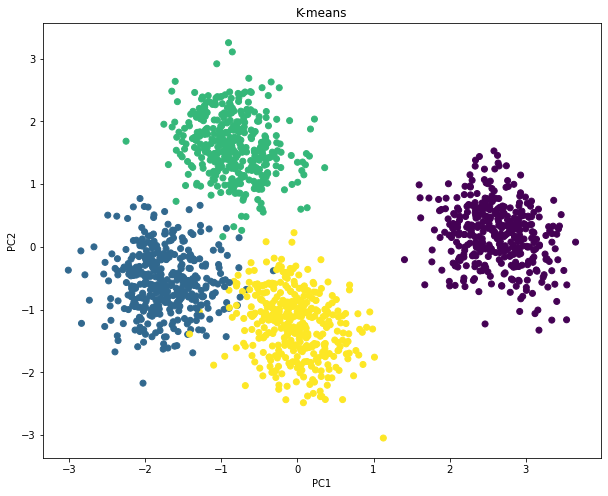

In [44]:
# usar o k-means para agrupar os dados em clusters e depois usar o PCA para reduzir a dimensionalidade dos dados e plotar os clusters em 2D

# biliotecas ja foram importadas no inicio do notebook

std = StandardScaler()
X = std.fit_transform(df)

# k-means
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(X)

# PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# plot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means')
plt.show()






In [46]:
# Obter os rótulos dos clusters para cada amostra
labels = kmeans.labels_
# Calcular a quantidade de elementos em cada cluster usando np.bincount()
cluster_counts = np.bincount(labels)

# Imprimir a quantidade de elementos em cada cluster
for cluster_num, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_num}: {count} elementos")






Cluster 0: 382 elementos
Cluster 1: 384 elementos
Cluster 2: 380 elementos
Cluster 3: 382 elementos


In [19]:
# Padronizando os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [21]:
# Lista para armazenar as inércias
inertias = []
# Testar diferentes valores de clusters (por exemplo, de 1 a 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4012b98700>
Traceback (most recent call last):
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/valdir/anaconda3/envs/dnc/lib/

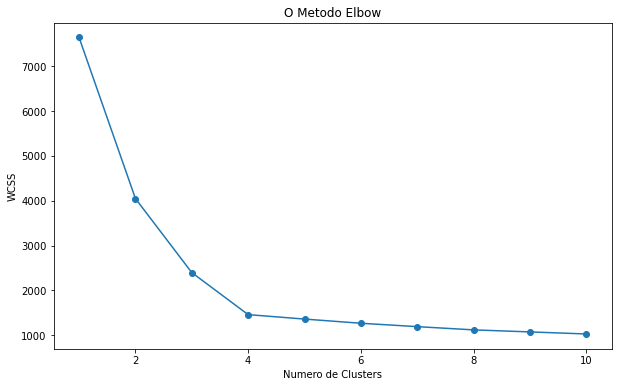

In [22]:
# plotar o grafico de inercia para definir o numero de clusters (k) que vamos usar
# para o KMeans
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()




In [ ]:
# KMeans(RandomState=123)
